A1 Implementation of the traveling salesman problem

In [1]:
# Python3 program to implement traveling salesman 
# problem using naive approach. 
from sys import maxsize 
from itertools import permutations
V = 4
 
# implementation of traveling Salesman Problem 
def travellingSalesmanProblem(graph, s): 
 
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
 
    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:
 
        # store current Path weight(cost) 
        current_pathweight = 0
 
        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight += graph[k][j] 
            k = j 
        current_pathweight += graph[k][s] 
 
        # update minimum 
        min_path = min(min_path, current_pathweight) 
         
    return min_path 
 
 
# Driver Code 
if __name__ == "__main__": 
 
    # matrix representation of graph 
    graph = [[0, 10, 15, 20], [10, 0, 35, 25], 
            [15, 35, 0, 30], [20, 25, 30, 0]] 
    s = 0
    print(travellingSalesmanProblem(graph, s))

80


In [ ]:
A1 Time spend by the algorithm as a function of the number of cities

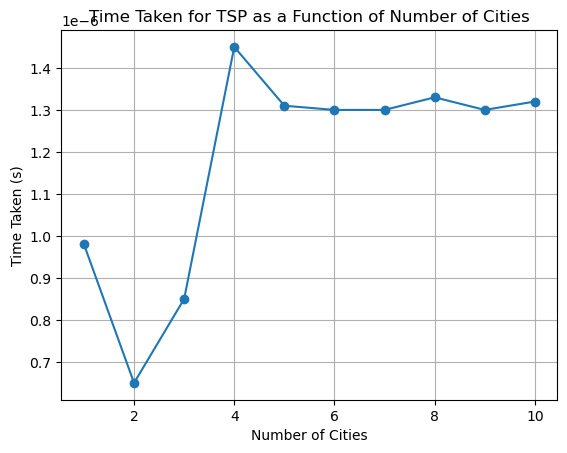

In [2]:
import timeit
import matplotlib.pyplot as plt
from itertools import permutations

def travellingSalesmanProblem(graph, s):
    vertex = []
    for i in range(len(graph)):
        if i != s:
            vertex.append(i)

    min_path = float('inf')
    next_permutation = permutations(vertex)
    total_time = 0
    num_iterations = 10  # Number of iterations 
    for _ in range(num_iterations):
        start_time = timeit.default_timer()  # Start timer
        for i in next_permutation:
            current_pathweight = 0
            k = s
            for j in i:
                current_pathweight += graph[k][j]
                k = j
            current_pathweight += graph[k][s]
            min_path = min(min_path, current_pathweight)
        end_time = timeit.default_timer()  # End timer
        total_time += (end_time - start_time)
    return total_time / num_iterations

if __name__ == "__main__":
    num_cities_list = list(range(1, 11))  # Number of cities from 1 to 10
    time_taken_list = []

    s = 0

    for num_cities in num_cities_list:
        
        graph = [[0, 10, 15, 20], [10, 0, 35, 25], 
                 [15, 35, 0, 30], [20, 25, 30, 0]] 
        
        time_taken_list.append(travellingSalesmanProblem(graph[:num_cities], s))

    plt.plot(num_cities_list, time_taken_list, marker='o')
    plt.xlabel('Number of Cities')
    plt.ylabel('Time Taken (s)')
    plt.title('Time Taken for TSP as a Function of Number of Cities')
    plt.grid(True)
    plt.show()

In [ ]:
A2 Subset Sum Problem using Backtracking

In [3]:
# Print all subsets if there is at least one subset of set[]
# with a sum equal to the given sum
flag = False
 
def print_subset_sum(i, n, _set, target_sum, subset):
    global flag
    # If targetSum is zero, then there exists a subset
    if target_sum == 0:
        # Prints valid subset
        flag = True
        print("[", end=" ")
        for element in subset:
            print(element, end=" ")
        print("]", end=" ")
        return
 
    if i == n:
        # Return if we have reached the end of the array
        return
 
    # Not considering the current element
    print_subset_sum(i + 1, n, _set, target_sum, subset)
 
    # Consider the current element if it is less than or equal to targetSum
    if _set[i] <= target_sum:
        # Push the current element into the subset
        subset.append(_set[i])
 
        # Recursive call for considering the current element
        print_subset_sum(i + 1, n, _set, target_sum - _set[i], subset)
 
        # Remove the last element after recursive call to restore subset's original configuration
        subset.pop()
 
# Driver code
if __name__ == "__main__":
    # Test case 1
    set_1 = [1, 2, 1]
    sum_1 = 3
    n_1 = len(set_1)
    subset_1 = []
    print("Output 1:")
    print_subset_sum(0, n_1, set_1, sum_1, subset_1)
    print()
    flag = False
 
    # Test case 2
    set_2 = [3, 34, 4, 12, 5, 2]
    sum_2 = 30
    n_2 = len(set_2)
    subset_2 = []
    print("Output 2:")
    print_subset_sum(0, n_2, set_2, sum_2, subset_2)
    if not flag:
        print("There is no such subset")

Output 1:
[ 2 1 ] [ 1 2 ] 
Output 2:
There is no such subset


In [ ]:
A2 Time by the algorithm as a function of the number of integrers

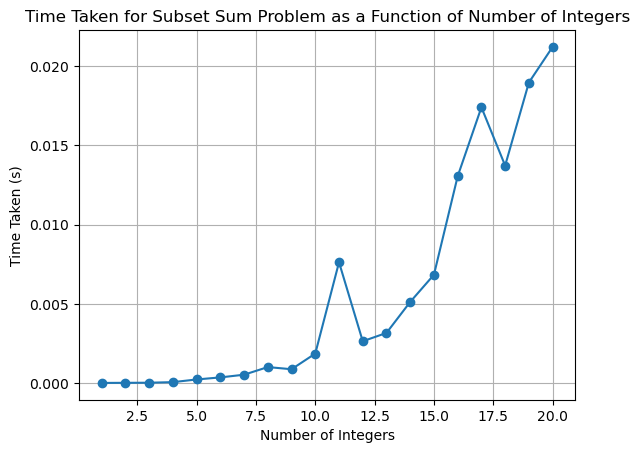

In [4]:
import timeit
import matplotlib.pyplot as plt

def print_subset_sum(i, n, _set, target_sum, subset):
    global flag
    if target_sum == 0:
        flag = True
        return
    if i == n:
        return
 
    print_subset_sum(i + 1, n, _set, target_sum, subset)
 
    if _set[i] <= target_sum:
        subset.append(_set[i])
        print_subset_sum(i + 1, n, _set, target_sum - _set[i], subset)
        subset.pop()
 
if __name__ == "__main__":
    num_integers_list = list(range(1, 21))  # Number of integers from 1 to 20
    time_taken_list = []
    num_iterations = 10  # Number of iterations
    
    for num_integers in num_integers_list:
        arr = list(range(1, num_integers + 1))
        
        total_time = 0
        for _ in range(num_iterations):
            start_time = timeit.default_timer()  # Start timer
            flag = False
            print_subset_sum(0, num_integers, arr, num_integers, [])  
            end_time = timeit.default_timer()  # End timer
            total_time += (end_time - start_time)
        
        time_taken_list.append(total_time)  # Append total time to list

    plt.plot(num_integers_list, time_taken_list, marker='o')
    plt.xlabel('Number of Integers')
    plt.ylabel('Time Taken (s)')
    plt.title('Time Taken for Subset Sum Problem as a Function of Number of Integers')
    plt.grid(True)
    plt.show()